## Desafio 3

O terceiro desafio para a solução do problema de uma mistura binária líquida de combustíveis, para aplicar no Ciclo de Rankine de uma usina elétrica a vapor consiste em:

- A combustão do composto escolhido.

Aspectos importantes a serem considerados:

- Os potenciais termodinâmicos (energia interna, entalpia, energia livre de Gibbs) envolvidos na reação de combustão.

- A entropia envolvida na reação de combustão.

- A equação de estado a ser usada para o sistema.

**Por que a reação de combustão deve ser calculada?**

No ciclo de Rankine, os líquidos são mantidos em uma câmara e é injetado oxigênio para entrarem em combustão e liberarem energia para o sistema. Desta forma, é importante determinar as propriedades termodinâmicas de entalpia, entropia e energia livre de Gibbs que estão relacionadas com a reação e fornecem informações sobre o comportamento do sistema, sendo possível determinar sua eficiência.

De acordo com ATKINS (2018), a entalpia é uma função termodinâmica que descreve a quantidade total de energia de um sistema, incluindo a energia interna e a energia transferida na forma de calor a pressão constante. É uma grandeza útil em termodinâmica porque descreve a quantidade de energia transferida durante uma reação química ou um processo físico a pressão constante.

Conforme MCQUARRIE e SIMON (1997), a entropia é uma medida da aleatoriedade ou do número de microestados possíveis em um sistema. Ela está relacionada à distribuição de energia e ao grau de aleatoriedade ou dispersão das partículas do sistema.

Ainda conforme MCQUARRIE e SIMON (1997), a energia livre de Gibbs determinar a espontaneidade de uma reação química ou processo físico. É útil para indicar o quanto de energia um sistema é capaz de fornecer para realizar determinado trabalho, considerando a energia disponível no sistema (entalpia) quanto a tendência à desordem (entropia), permitindo fazer previsões sobre a direção e a viabilidade de reações químicas.

O problema envolve a reação de combustão do ciclohexano (C6H12). A temperatura considerada para o sistema em estudo é 110°C, visto que os compostos estão localizados em uma região do ciclo de constante aquecimento, anterior a etapa de resfriamento do composto que sai da câmara sob a forma de vapor, após a destilação fracionada desenvolvida no desafio 2. Nesse trabalho será considerada a combustão completa.

In [1]:
# Instalações

#!pip install chempy

In [2]:
# Importações

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
#from chempy import balance_stoichiometry

#### Capacidade térmica a pressão constante - Experimental

Os dados de Capacidade Térmica a pressão constante $(C_p)$ para o Ciclohexano na fase de vapor, no intervalo de temperatura entre $50K$ e $1500K$, foram obtidos por meio da plataforma NIST (National Institute of Standards and Technology)

In [3]:
file_C6H12 = "Dados Cp - Ciclohexano -  Nist.xlsx"
df_C6H12 = pd.read_excel(file_C6H12, header=0, usecols=[0, 1])
df_C6H12.head()

,"Cp,gas (J/mol*K)",Temperature (K)
0,34.07,50.00
1,42.59,100.00
2,54.80,150.00
3,69.05,200.00
4,95.20,273.15


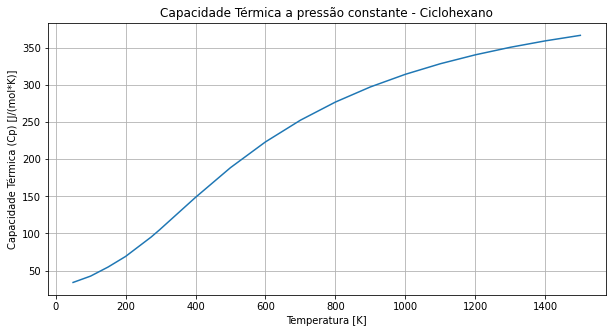

In [4]:
Temperatura_ciclohexano = df_C6H12.iloc[:, 1]
Cp_ciclohexano = df_C6H12.iloc[:, 0]

plt.figure(figsize = ((10, 5)))
plt.plot(Temperatura_ciclohexano, Cp_ciclohexano)
plt.xlabel('Temperatura [K]')
plt.ylabel('Capacidade Térmica (Cp) [J/(mol*K)]')
plt.title('Capacidade Térmica a pressão constante - Ciclohexano')
plt.grid()
plt.show()

#print(Temperatura_ciclohexano, Cp_ciclohexano)

#### Capacidade térmica a pressão constante - Teórico

A $C_p$ para o ciclohexano na fase de vapor foi calculada teoricamente, aplicando a Equação de Shomate, uma equação empírica que descreve a capacidade térmica de substâncias em uma ampla faixa de temperatura. Ela é baseada em coeficientes ajustados experimentalmente e é expressa como uma função polinomial da temperatura. A Equação de Shomate na forma generalizada é

$$C_p = A + BT + CT^2 + DT^3 + ET^4$$

cujos coeficientes e fórmula foram obtidos por meio da tabela PHYSICAL PROPERTIES OF LIQUIDS AND GASES, disponibilizada pela ELSEVIER, considerando o intervalo de temperatura entre $100K$ e $1500K$ para a unidade de medida $j/(mol \cdot K)$.

In [5]:
# Definição do intervalo de temperatura, conforme a temperatura obtida para o ciclohexano

intervalo_T = np.linspace(min(Temperatura_ciclohexano), max(Temperatura_ciclohexano), len(Temperatura_ciclohexano)) # K

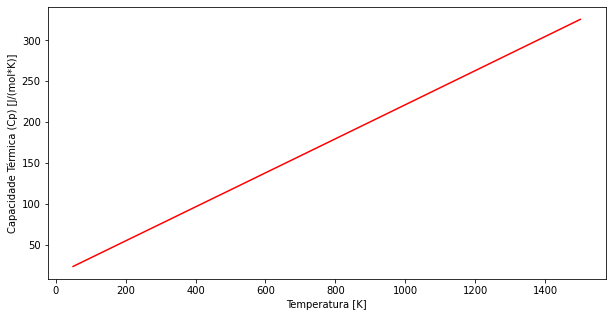

In [6]:
Cp_c = []

for i in range(len(intervalo_T)):
    A = 13.783
    B = 2.0742*10**(-1)
    C = 5.3682*10**(-4)
    D = -6.3012*10**(-7)
    E = 1.8988*10**(-10)
    T = intervalo_T[i]
    equacao_shomate = A + B*T + (C*T)**2 + (D*T)**3 + (E*T)**4
    Cp_c.append(equacao_shomate)
    
plt.figure(figsize = ((10, 5)))
plt.plot(intervalo_T, Cp_c, color = 'red')
plt.xlabel('Temperatura [K]')
plt.ylabel('Capacidade Térmica (Cp) [J/(mol*K)]')
plt.show()

#### Comparação entre os dados téoricos e experimentais para o Ciclohexano

Nesta seção foi realizada uma comparação entre a $C_p$ obtida pela Equação de Shomate e pelo NIST, considerando o mesmo intervalo de temperatura em que foram disponibilizados os dados experimentais (NIST), baseado na literatura.

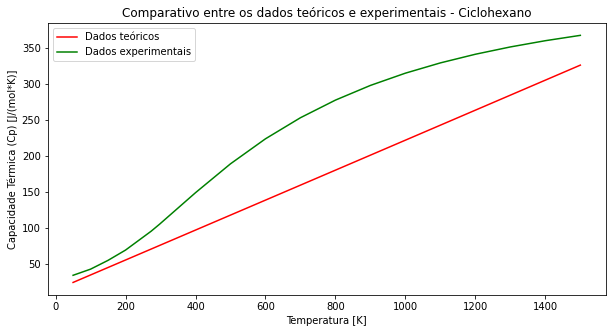

In [7]:
plt.figure(figsize = ((10, 5)))
plt.plot(intervalo_T, Cp_c, color = 'red', label = 'Dados teóricos')
plt.plot(Temperatura_ciclohexano, Cp_ciclohexano, color = 'green', label = 'Dados experimentais')
plt.xlabel('Temperatura [K]')
plt.ylabel('Capacidade Térmica (Cp) [J/(mol*K)]')
plt.title('Comparativo entre os dados teóricos e experimentais - Ciclohexano')
plt.legend()
plt.show()

É constatada a grande diferença entre a variação obtida pelos dados teóricos e experimentais, uma vez que a equação de Shomate não apresenta as condições ambientais em que os experimentos foram realizados, bem como os coeficientes podem não representar as peculiaridades do hidrocarboneto durante a mudança de fase. Sendo assim, serão considerados os dados experimentais para determinar os potenciais termodinâmicos.

### Capacidade térmica calculada para o Oxigênio, Dióxido de Carbono e Água, utilizando os dados disponibilizados pela ELSEVIER

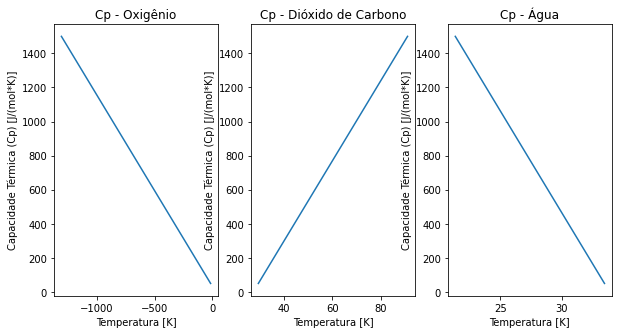

In [8]:
# Cálculo de Cp para o Oxigênio

Cp_O = []

for i in range(len(intervalo_T)):
    A = 29.526
    B = -8.8999*10**(-1)
    C = 3.8083*10**(-5)
    D = -3.2629*10**(-7)
    E = 8.8607*10**(-10)
    T = intervalo_T[i]
    equacao_shomate = A + B*T + (C*T)**2 + (D*T)**3 + (E*T)**4
    Cp_O.append(equacao_shomate)
        
# Cálculo de Cp para o Dióxido de Carbono

Cp_CO2 = []

for i in range(len(intervalo_T)):
    A = 27.437
    B = 4.2315*10**(-2)
    C = -1.9555*10**(-5)
    D = 3.9968*10**(-9)
    E = -2.9872*10**(-13)
    T = intervalo_T[i]
    equacao_shomate = A + B*T + (C*T)**2 + (D*T)**3 + (E*T)**4
    Cp_CO2.append(equacao_shomate)
        
# Cálculo de Cp para a água

Cp_H2O = []

for i in range(len(intervalo_T)):
    A = 33.933
    B = -8.4186*10**(-3)
    C = 2.9906*10**(-5)
    D = 1.7825*10**(-8)
    E = 3.6934*10**(-12)
    T = intervalo_T[i]
    equacao_shomate = A + B*T + (C*T)**2 + (D*T)**3 + (E*T)**4
    Cp_H2O.append(equacao_shomate)

# Plotagem dos gráficos

plt.figure(figsize = ((10, 5)))
plt.subplot(1, 3, 1)
plt.plot(Cp_O, intervalo_T)
plt.title('Cp - Oxigênio')
plt.xlabel('Temperatura [K]')
plt.ylabel('Capacidade Térmica (Cp) [J/(mol*K)]')
plt.subplot(1, 3, 2)
plt.plot(Cp_CO2, intervalo_T)
plt.title('Cp - Dióxido de Carbono')
plt.xlabel('Temperatura [K]')
plt.ylabel('Capacidade Térmica (Cp) [J/(mol*K)]')
plt.subplot(1, 3, 3)
plt.plot(Cp_H2O, intervalo_T)
plt.title('Cp - Água')
plt.xlabel('Temperatura [K]')
plt.ylabel('Capacidade Térmica (Cp) [J/(mol*K)]')
plt.show()

### Entalpia de formação calculada algebricamente ao integrar a capacidade térmica obtida pela equação de Shomate para o oxigênio, dióxido de carbono e água.

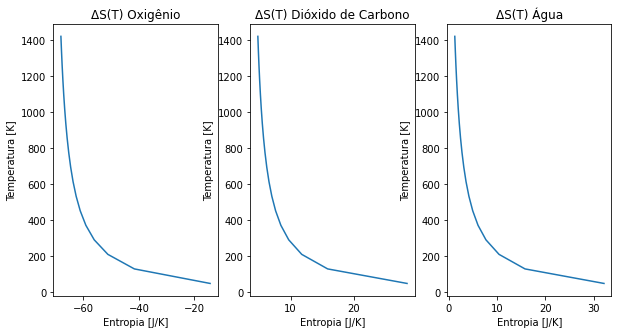

In [9]:
Cp_1 = range(len(Cp_O)-1)
Cp_2 = range(len(Cp_CO2)-1)
Cp_3 = range(len(Cp_H2O)-1)
temp = range(len(intervalo_T)-1)

entalpia_O = []
entalpia_CO2 = []
entalpia_H2O = []


for j in temp:
    A = 29.526
    B = -8.8999*10**(-1)
    C = 3.8083*10**(-5)
    D = -3.2629*10**(-7)
    E =  8.8607*10**(-10)
    T = intervalo_T[i]
    ΔH = A*(intervalo_T[j+1] - intervalo_T[j]) + ((B*(intervalo_T[j+1] - intervalo_T[j]))**2)/2 + ((C*(intervalo_T[j+1] - intervalo_T[j]))**3)/3 + ((D*(intervalo_T[j+1] - intervalo_T[j]))**4)/4 + ((E*(intervalo_T[j+1] - intervalo_T[j]))**5)/5
    entalpia_O.append(ΔH)

for j in temp:
    A = 27.437
    B = 4.2315*10**(-2)
    C = -1.9555*10**(-5)
    D = 3.9968*10**(-9)
    E = -2.9872*10**(-13)
    T = intervalo_T[i]
    ΔH = A*(intervalo_T[j+1] - intervalo_T[j]) + ((B*(intervalo_T[j+1] - intervalo_T[j]))**2)/2 + ((C*(intervalo_T[j+1] - intervalo_T[j]))**3)/3 + ((D*(intervalo_T[j+1] - intervalo_T[j]))**4)/4 + ((E*(intervalo_T[j+1] - intervalo_T[j]))**5)/5
    entalpia_CO2.append(ΔH)

for j in temp:
    A = 33.933
    B = -8.4186*10**(-3)
    C = 2.9906*10**(-5)
    D = 1.7825*10**(-8)
    E = 3.6934*10**(-12)
    T = intervalo_T[i]
    ΔH = A*(intervalo_T[j+1] - intervalo_T[j]) + ((B*(intervalo_T[j+1] - intervalo_T[j]))**2)/2 + ((C*(intervalo_T[j+1] - intervalo_T[j]))**3)/3 + ((D*(intervalo_T[j+1] - intervalo_T[j]))**4)/4 + ((E*(intervalo_T[j+1] - intervalo_T[j]))**5)/5
    entalpia_H2O.append(ΔH)

# print('Entalpia - Oxigênio:', entropia_O)
# print()
# print('Entalpia - Dióxido de Carbono:', entropia_CO2)
# print()
# print('Entalpia - Água:', entropia_H2O)
# print()

entropia_O = []
entropia_CO2 = []
entropia_H2O = []

intervalo_T = list(intervalo_T)

for i, j in zip(Cp_1, temp):
    #ΔS = (Cp_O[i]/intervalo_T[j]) # * (Temperatura_ciclohexano[j+1] - Temperatura_ciclohexano[j])
    ΔS = Cp_O[i]*np.log(intervalo_T[j+1]/intervalo_T[j])
    entropia_O.append(ΔS)

for i, j in zip(Cp_2, temp):
    #ΔS = (Cp_CO2[i]/intervalo_T[j]) # * (Temperatura_ciclohexano[j+1] - Temperatura_ciclohexano[j])
    ΔS = Cp_CO2[i]*np.log(intervalo_T[j+1]/intervalo_T[j])
    entropia_CO2.append(ΔS)
    
for i, j in zip(Cp_3, temp):
    #ΔS = (Cp_H2O[i]/intervalo_T[j]) # * (Temperatura_ciclohexano[j+1] - Temperatura_ciclohexano[j])
    ΔS = Cp_H2O[i]*np.log(intervalo_T[j+1]/intervalo_T[j])
    entropia_H2O.append(ΔS)
    
# print('Entropia - Oxigênio:', entropia_O)
# print()
# print('Entropia - Dióxido de Carbono:', entropia_CO2)
# print()
# print('Entropia - Água:', entropia_H2O)

remove = intervalo_T.pop(-1)

plt.figure(figsize = ((10, 5)))
plt.subplot(1, 3, 1)
plt.plot(entropia_O, intervalo_T)
plt.title('ΔS(T) Oxigênio')
plt.xlabel('Entropia [J/K]')
plt.ylabel('Temperatura [K]')
plt.subplot(1, 3, 2)
plt.plot(entropia_CO2, intervalo_T)
plt.title('ΔS(T) Dióxido de Carbono')
plt.xlabel('Entropia [J/K]')
plt.ylabel('Temperatura [K]')
plt.subplot(1, 3, 3)
plt.plot(entropia_H2O, intervalo_T)
plt.title('ΔS(T) Água')
plt.xlabel('Entropia [J/K]')
plt.ylabel('Temperatura [K]')
plt.show()

**Observação:** Conforme constatado, os dados calculados para a capacidade térmica a pressão constante de cada elemento não representaram o comportamento que deveriam, ou seja, todas as inclinações ascendentes e com variações irregurales durante a transferência de calor para o sistema. Isso está relacionado aos coeficientes apresentados para o intervalo de temperatura definido, visto que não estão ajustados para intervalos menores que o passo de integração de 100K e não estão considerando a mudança de fase das substâncias. Ainda que o cálculo da capacidade térmica esteja incoerente com a realidade e a entropia dependa dessa variável termodinâmica, o comportamento da entropia está coerente para o intervalo entre 298K e 383K, representando a fase de vapor em uma gaussiana, visto que a entropia representa a variação conforme os microestados de energia do sistema, e alguns microestados têm maior probabilidade de ocorrência do que outros. Na imagem adiante, após o ponto crítico, em que houve a mudança de estado líquido para o estado gasoso, observa-se esse comportamento.

De acordo com a segunda lei da termodinâmica, a variação de entropia de um sistema isolado é sempre positiva ou nula, sendo que ΔS = 0 ocorre quando os processos são reversíveis e não aumentam a entropia. Logo, a entropia apresenta a propriedade de não ser conservativa. A produção de entalpia não pode ser negativa, no entanto, a variação de entropia pode ser negativa na circunstância de um sistema em geral estar transferindo o calor para fora dele.

As imagens a seguir foram obtidas através do ficheiro da wikimedia e apresentam o diagrama T-S para uma substância pura:
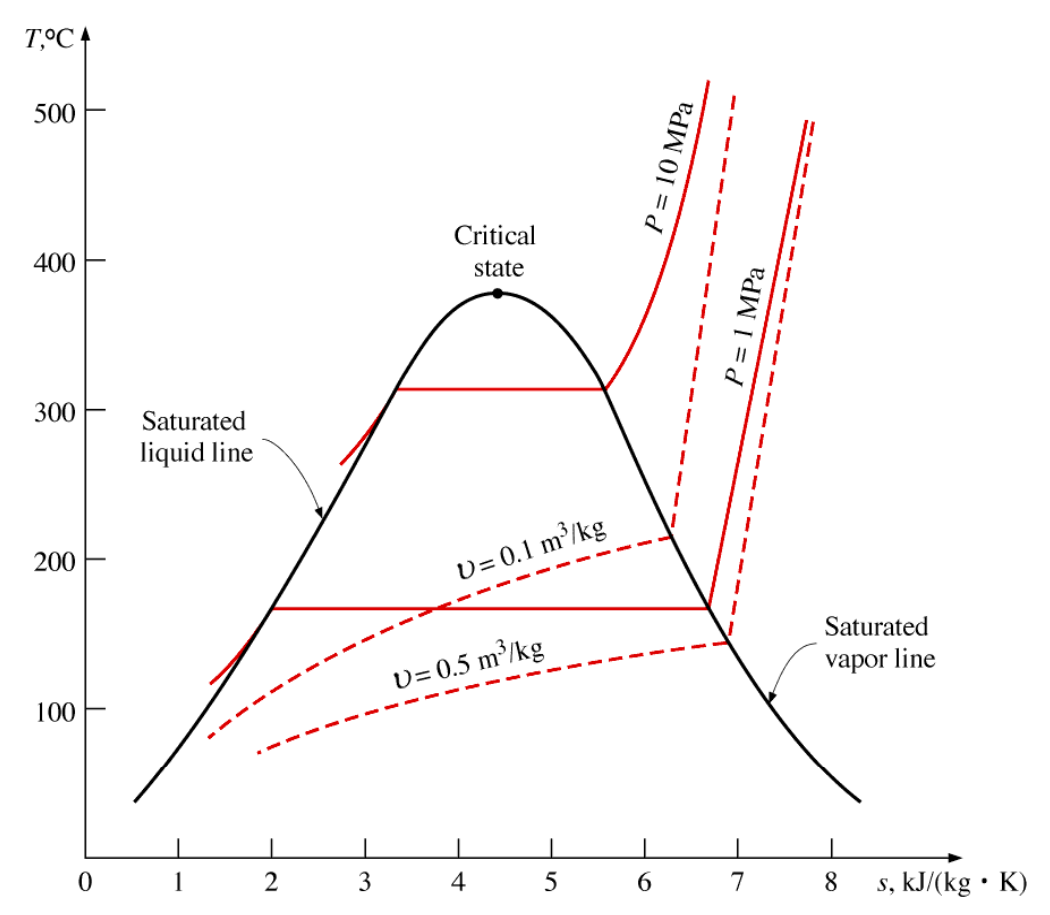
A entropia aumenta enquanto o sistema está recebendo calor na fase líquida e antes de atingir o ponto crítico, a temperatura diminui quando a substância está na fase de vapor. Esse sistema pode ser reversível, como no ciclo de Rankine que é um sistema fechado, em que o fluído de trabalho, geralmente a água, se alterna de líquido para vapor ciclicamente, como ilustrado na imagem abaixo, nos pontos 1-2 (Bomba) e 2-3a-3b(Caldeira) o calor é absorvido, 3-4(Turbina) e 4-1(Condensador) o calor é cedido.
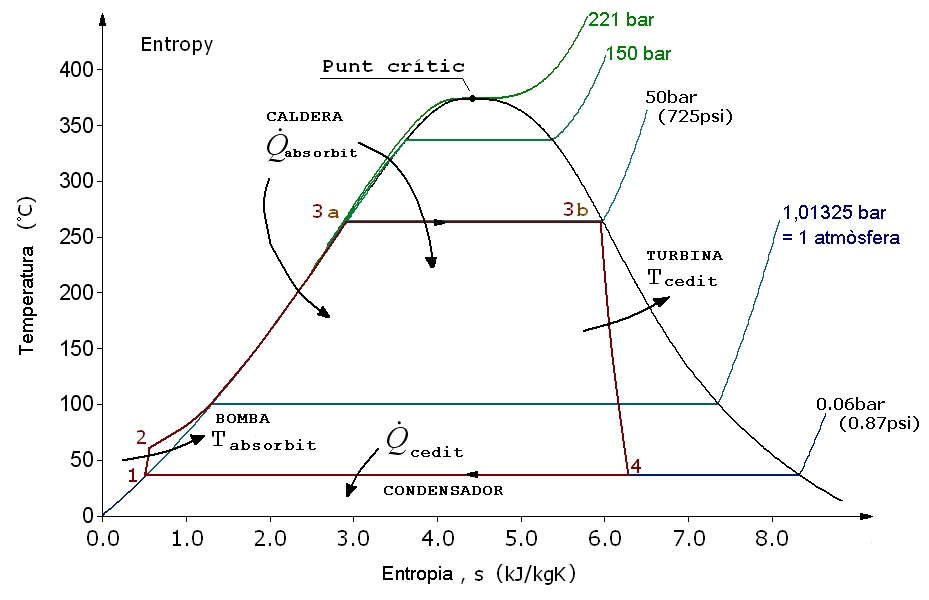

### Capacidade térmica calculada para o Oxigênio, Dióxido de Carbono e Água, utilizando os dados disponibilizados pelo NIST.

#### Os dados teóricos foram calculados pela equação de Shomate.


$$C_p = A + B \cdot t + C \cdot t^2 + D \cdot t^3 + E/t^2$$

E os dados para entalpia e entropia padrão foram determinados pelas respectivas equações

$$H^{\circ} - H^{\circ}298.15= A \cdot t + B \cdot t^2/2 + C \cdot t^3/3 + D \cdot t^4/4 - E/t + F - H$$

$$S^{\circ} = A \cdot ln(t) + B \cdot t + C \cdot t^2/2 + D \cdot t^3/3 − E/(2 \cdot t^2) + G$$

Sendo que:

$C_p$ = Capacidade Térmica padrão $(J/mol \cdot K)$

$H^{\circ}$ = Entalpia padrão $(kJ/mol)$

$S^{\circ}$ = Entropia padrão $(J/mol \cdot K)$

$t$ = temperature $(K) / 1000$

In [10]:
file_O = "Dados Cp gas - Oxigênio -  Nist.xlsx"
df_O = pd.read_excel(file_O, header=0, usecols=[0, 1, 2, 3, 4])
df_O.head()

,Temperature (K),Cp (J/mol*K),S° (J/mol*K),-(G° - H°298.15)/T (J/mol*K),H° - H°298.15 (kJ/mol)
0,100.0,29.10,173.3,231.1,-5.78
1,200.0,29.11,193.5,207.8,-2.87
2,300.0,29.39,205.3,205.1,0.05
3,400.0,30.10,213.9,206.3,3.03
4,500.0,31.08,220.7,208.5,6.08


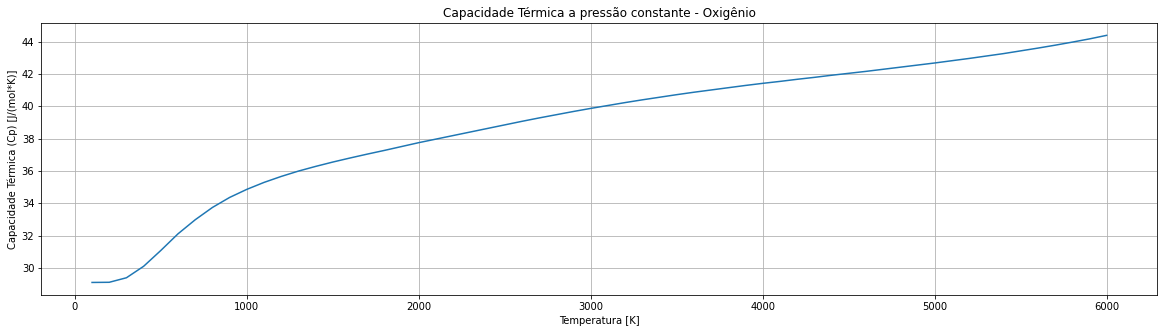

In [11]:
Temperatura_oxigenio = df_O.iloc[:, 0]
Cp_oxigenio = df_O.iloc[:, 1]

plt.figure(figsize = ((20, 5)))
plt.plot(Temperatura_oxigenio, Cp_oxigenio)
plt.xlabel('Temperatura [K]')
plt.ylabel('Capacidade Térmica (Cp) [J/(mol*K)]')
plt.title('Capacidade Térmica a pressão constante - Oxigênio')
plt.grid()
plt.show()

**Observação:** Há uma grande variação da capacidade térmica observada no intervalo entre 100K e 1000K, envolvendo a faixa de temperatura estudada que compreende entre 298K (temperatura ambiente) e 383K (temperatura do sistema na fase definida). Após 1000K é observada uma constância na variação da capacidade térmica.

In [12]:
file_CO2 = "Dados Cp gas - Dióxido de Carbono -  Nist.xlsx"
df_CO2 = pd.read_excel(file_CO2, header=0, usecols=[0, 1, 2, 3, 4])
df_CO2.head()

,Temperature (K),Cp (J/mol*K),S° (J/mol*K),-(G° - H°298.15)/T (J/mol*K),H° - H°298.15 (kJ/mol)
0,298.0,37.12,213.8,213.8,-0.01
1,300.0,37.22,214.0,213.8,0.07
2,400.0,41.34,225.3,215.3,4.00
3,500.0,44.61,234.9,218.3,8.31
4,600.0,47.32,243.3,221.8,12.91


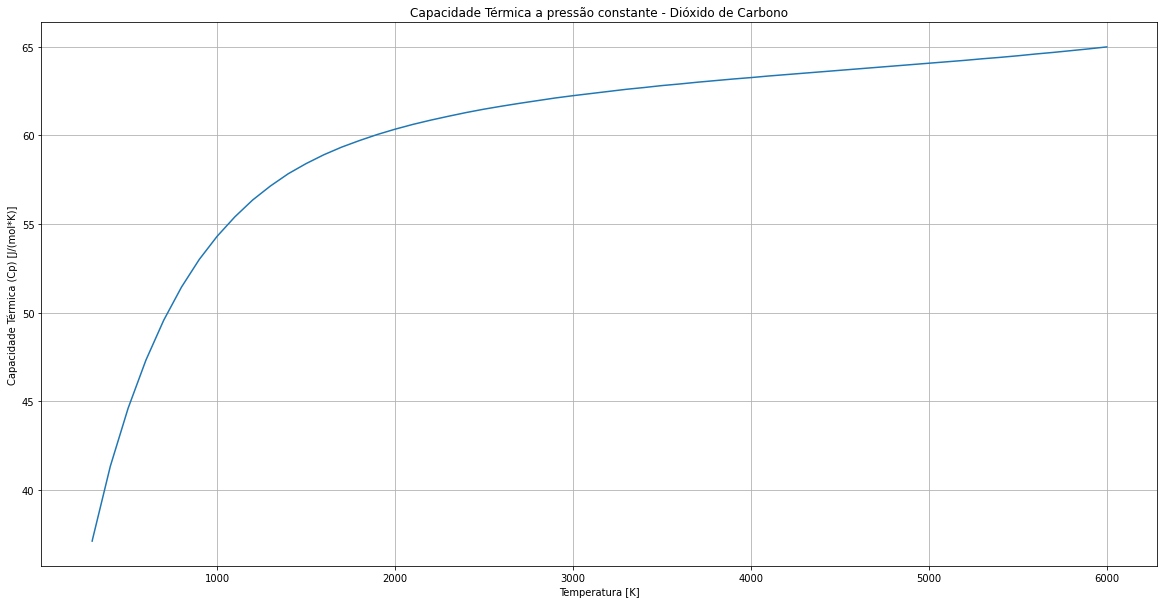

In [13]:
Temperatura_gas_carbonico = df_CO2.iloc[:, 0]
Cp_gas_carbonico = df_CO2.iloc[:, 1]

plt.figure(figsize = ((20, 10)))
plt.plot(Temperatura_gas_carbonico, Cp_gas_carbonico)
plt.xlabel('Temperatura [K]')
plt.ylabel('Capacidade Térmica (Cp) [J/(mol*K)]')
plt.title('Capacidade Térmica a pressão constante - Dióxido de Carbono')
plt.grid()
plt.show()

**Observação:** Há uma grande variação da capacidade térmica observada no intervalo entre 100K e 1500K. Após 1500K observa-se uma constância na variação da capacidade térmica.

In [14]:
file_H2O = "Dados Cp gas - Água -  Nist.xlsx"
df_H2O = pd.read_excel(file_H2O, header=0, usecols=[0, 1, 2, 3, 4])
df_H2O.head()

,Temperature (K),Cp (J/mol*K),S° (J/mol*K),-(G° - H°298.15)/T (J/mol*K),H° - H°298.15 (kJ/mol)
0,500.0,35.22,206.5,192.7,6.92
1,600.0,36.32,213.1,195.5,10.50
2,700.0,37.50,218.7,198.5,14.19
3,800.0,38.74,223.8,201.3,18.00
4,900.0,40.00,228.5,204.1,21.94


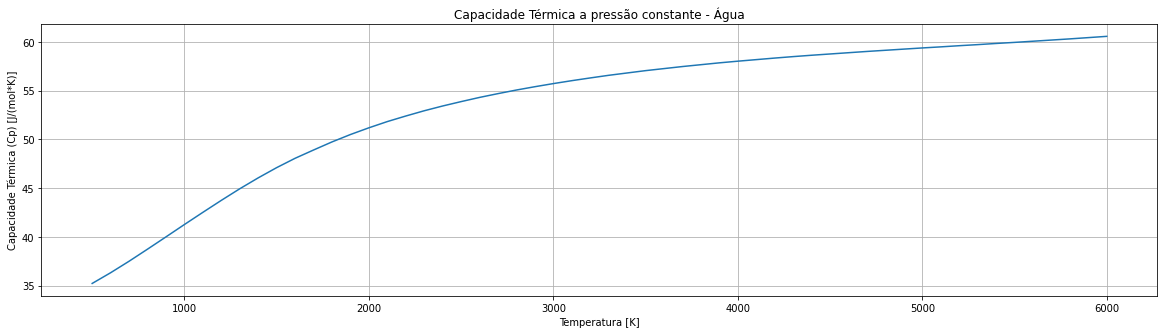

In [15]:
Temperatura_agua = df_H2O.iloc[:, 0]
Cp_agua = df_H2O.iloc[:, 1]

plt.figure(figsize = ((20, 5)))
plt.plot(Temperatura_agua, Cp_agua)
plt.xlabel('Temperatura [K]')
plt.ylabel('Capacidade Térmica (Cp) [J/(mol*K)]')
plt.title('Capacidade Térmica a pressão constante - Água')
plt.grid()
plt.show()

**Observação:** O NIST disponibiliza poucos dados para o Cp inferior a 500K e o intervalo de maior abrangência é entre 500K e 6000K para a água no estado gasoso. É verificada uma variação da capacidade térmica observada no intervalo entre 500K e 2000K e uma tendência a capacidade térmica se tornar constante após os 2000K.

#### Para a variação da água em temperatura inferior a 500K foram usados os dados disponibilizados pelo site The Engineering ToolBox

In [16]:
file_H2O_ET = "Dados Cp - Água - Engineering ToolBox.xlsx"
df_H2O_ET = pd.read_excel(file_H2O_ET, header=0, usecols=[0, 1])
df_H2O_ET.head()

,Temperature [°C],Specific Heat (Cp) [J/(mol K)]
0,0.01,76.026
1,10.00,75.586
2,20.00,75.386
3,25.00,75.336
4,30.00,75.309


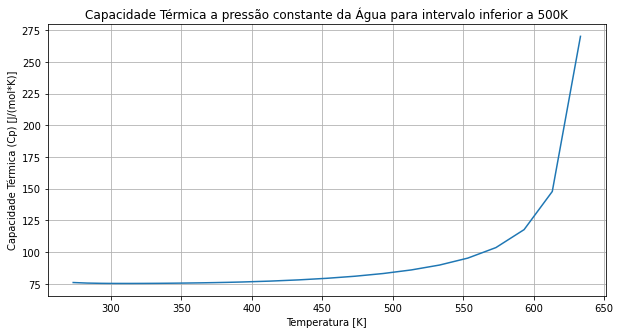

In [17]:
Temperatura_agua_ET = df_H2O_ET.iloc[:, 0]+273.15 # Transformação para K
Cp_agua_ET = df_H2O_ET.iloc[:, 1]

plt.figure(figsize = ((10, 5)))
plt.plot(Temperatura_agua_ET, Cp_agua_ET)
plt.xlabel('Temperatura [K]')
plt.ylabel('Capacidade Térmica (Cp) [J/(mol*K)]')
plt.title('Capacidade Térmica a pressão constante da Água para intervalo inferior a 500K')
plt.grid()
plt.show()

O comportamento apresentado para todas as substâncias abordadas com maior variação de $C_p$ no intervalo inicial de temperatura, e uma tendência a progressão constante de $C_p$ ao fornecer maior calor ao sistema, pode ser explicado pela variação dos graus de liberdade dos átomos e moléculas.

Os princípios da termodinâmica descrevem o comportamento da energia térmica e das partículas em sistemas físicos. A temperatura é uma medida da energia cinética média das partículas em uma substância. Quanto maior a temperatura, maior é a energia cinética média das partículas. Isso significa que as partículas estão se movendo mais rapidamente e têm uma energia cinética maior. Enquanto o calor é a energia térmica transferida de regiões de maior temperatura para regiões de menor temperatura. É o processo de transferência de energia térmica até que atinjam o equilíbrio térmico.

Já a energia térmica transmitida como calor é armazenada nas partículas da matéria. Em átomos, essa energia térmica é armazenada principalmente como energia cinética translacional, ou seja, movimento de translação das partículas. Em moléculas, além da energia cinética translacional, parte da energia térmica é armazenada como energia cinética rotacional, que está associada à rotação das moléculas em torno de seu eixo.

Em substâncias com ligações químicas interatômicas, parte da energia térmica pode ser convertida em energia potencial associada aos modos de vibração das ligações. Esses modos de vibração correspondem a movimentos de oscilação dos átomos em torno de suas posições de equilíbrio. Essa energia potencial de vibração está associada aos níveis de energia mais altos nas ligações interatômicas.

Os três modos de movimento das partículas, translação, rotação e vibração (associada às energias cinética e potencial) constituem os graus de liberdade e contribuem para a capacidade térmica da substância.

Conforme LEVINE (2002), os graus de liberdade estão relacionados com o princípio da equipartição de energia na termodinâmica estatística. O princípio da equipartição estabelece que, em equilíbrio térmico, cada grau de liberdade de um sistema contribui igualmente para a energia total. A relação entre os graus de liberdade e a $C_p$ é dada pela equação:

$$Cp = (\frac{f}{2}) \cdot R$$

Onde:

$Cp$ é a capacidade térmica a pressão constante.

$f$ é o número total de graus de liberdade.

$R$ é a constante dos gases ideais (8,314 J/(mol·K)).

O número total de graus de liberdade é dividido por 2 porque cada grau de liberdade contribui com $(\frac{1}{2}) \cdot R$ para a capacidade térmica.

Portanto, os graus de liberdade referem-se ao número de maneiras independentes pelas quais as partículas de um sistema podem armazenar energia cinética. Em altas temperaturas para os gases ideais, o número de graus de liberdade da molécula influencia o calor específico que é uma medida da capacidade térmica por unidade de massa da substância. Então, por mais que seja fornecida maior temperatura às moléculas de uma substância, verifica-se uma tendência da $C_p$ se tornar constante, pois cada grau de liberdade contribui igualmente para a energia cinética total quando a molécula está em alto grau de excitação térmica.

#### Equação balanceada para a reação de combustão envolvendo ciclohexano e oxigênio

Reagentes: C6H12+O2

Produtos: CO2+H2O

##### Função que realiza o cálculo estequiométrico

In [18]:
# from funcoes import *

O balanço das reações é

$$1C6H12_{(l)} + 9O2_{(g)} → 6CO2_{(g)} + 6H2O_{(l)}$$

### Cálculo dos potenciais químicos

Para essa etapa foram aplicados os passos:

- Balanço estequiométrico da reação de combustão
- Multiplicação dos coeficientes (número de mols) pelos valores de entalpia de formação de cada elemento
- A variação entre a entalpia de formação dos produtos e reagentes $\Delta H_f = \Delta H_{f_{prod}} - \Delta H_{f_{reag}}$

A Entalpia de Reação de Combustão $(\Delta _rH)$ foi calculada para cada composto, considerando seus respectivos coeficientes

$$aX + bB → yY + zZ$$

Para a reação de combustão do ciclohexano envolvendo oxigênio que produz gás carbônico e água

$$aC_6H_{12} + bO_2 → yCO_2 + zH_20$$

A variação da entalpia de combustão para a temperatura $T_1$ é

$$\Delta _rH (T_2) = y[H_Y(T_2)-H_Y(0)] + z[H_Z(T_2)-H_Z(0)] - a[H_A(T_2) - H_A(0)] - b[H_B(T_2) - H_B(0)]$$

A variação da entalpia de combustão para a temperatura $T_2$ é

$$\Delta _rH (T_1) = y[H_Y(T_1)-H_Y(0)] + z[H_Z(T_1)-H_Z(0)] - a[H_A(T_1) - H_A(0)] - b[H_B(T_1) - H_B(0)]$$

E a variação entre $T_1$ e $T_2$ é

$$\Delta _rH (T_2) - \Delta _rH (T_1) =
y[H_Y(T_2)-H_Y(T_1)] + z[H_Z(T_2)-H_Z(T_1)] - a[H_A(T_2) - H_A(T_1)] - b[H_B(T_2) - H_B(T_1)]$$

Sendo que:

$T_1$ é a temperatura ambiente (298K)

$T_2$ é a temperatura do sistema na fase observada (383K)

#### Entalpia de Reação de Combustão

A entalpia pode ser obtida a partir da $C_p$ em função da variação de temperatura pela integral

$$ \int_{T_1}^{T_2} C_p (T) dt$$

Que ao ser resolvida, tem-se

$$ \int_{T_1}^{T_2} C_p \cdot (T_2 - T_1) dt$$

A seguir essa integral é aplicada numericamente e não algebricamente pela equação de Shomate, devido a limitação em implementar a equação dada a variação dos coeficientes para a situação desejada

In [19]:
a = 1
b = 9
y = 6
z = 6

# Para temperatura de 298K e 1 atm

ΔfH_C6H12_25 = -157.7 # Entalpia de formação padrão (líquido) em KJ/mol
ΔfH_O2_25 = 0 # não possui entalpia de formação
ΔfH_CO2_25 = -393.52 # Entalpia de formação padrão (gás) em KJ/mol
ΔfH_H2O_25 = -285.83 # Entalpia de formação padrão (líquido) em KJ/mol

# Para temperatura de 383K e 1 atm

T_1 = 298 # K
T_2 = 383 # K

# Interpolação para encontrar o valor de Cp para cada substância no intervalo entre 298K a 383K
# Integração de Cp(T) para o intervalo de 298K a 383K para obter a entalpia

passo_integracao = 0.01
intervalo_temperatura = np.arange(T_1, T_2+1, passo_integracao)
intervalo_temperatura = list(intervalo_temperatura)

# Entalpia de formação para o Ciclohexano

Cp_C6H12 = []
ΔfH_C6H12 = []

for i in range(len(intervalo_temperatura)):
    ponto = intervalo_temperatura[i]
    f = interp1d(Temperatura_ciclohexano, Cp_ciclohexano)
    cp_C6H12 = f(ponto)
    Cp_C6H12.append(cp_C6H12)

for i, j in zip(range(len(Cp_C6H12)-1), range(len(intervalo_temperatura)-1)):
    Entalpia_C6H12 = Cp_C6H12[i]*(intervalo_temperatura[j+1]-intervalo_temperatura[j])
    ΔfH_C6H12.append(Entalpia_C6H12)

ΔfH_C6H12_110 = sum(ΔfH_C6H12)/1000

# Entalpia de formação para o Oxigênio

Cp_O2 = []
ΔfH_O2 = []

for i in range(len(intervalo_temperatura)):
    ponto = intervalo_temperatura[i]
    f = interp1d(Temperatura_oxigenio, Cp_oxigenio)
    cp_O2 = f(ponto)
    Cp_O2.append(cp_O2)

for i, j in zip(range(len(Cp_O2)-1), range(len(intervalo_temperatura)-1)):
    Entalpia_O2 = Cp_O2[i]*(intervalo_temperatura[j+1]-intervalo_temperatura[j])
    ΔfH_O2.append(Entalpia_O2)

ΔfH_O2_110 = sum(ΔfH_O2)/1000

# Entalpia de formação para o Dióxido de Carbono

Cp_CO2 = []
ΔfH_CO2 = []

for i in range(len(intervalo_temperatura)):
    ponto = intervalo_temperatura[i]
    f = interp1d(Temperatura_gas_carbonico, Cp_gas_carbonico)
    cp_CO2 = f(ponto)
    Cp_CO2.append(cp_CO2)

for i, j in zip(range(len(Cp_CO2)-1), range(len(intervalo_temperatura)-1)):
    Entalpia_CO2 = Cp_CO2[i]*(intervalo_temperatura[j+1]-intervalo_temperatura[j])
    ΔfH_CO2.append(Entalpia_CO2)

ΔfH_CO2_110 = sum(ΔfH_CO2)/1000

# Entalpia de formação para a Água

Cp_H2O = []
ΔfH_H2O = []

for i in range(len(intervalo_temperatura)):
    ponto = intervalo_temperatura[i]
    f = interp1d(Temperatura_agua_ET, Cp_agua_ET)
    cp_H2O = f(ponto)
    Cp_H2O.append(cp_H2O)

for i, j in zip(range(len(Cp_H2O)-1), range(len(intervalo_temperatura)-1)):
    Entalpia_H2O = Cp_H2O[i]*(intervalo_temperatura[j+1]-intervalo_temperatura[j])
    ΔfH_H2O.append(Entalpia_H2O)

ΔfH_H2O_110 = sum(ΔfH_H2O)/1000

A entalpia é uma grandeza relativa. Isso se justifica porque é medida em relação a um estado de referência específico. A entalpia absoluta de um sistema não tem significado físico direto, uma vez que a entalpia é uma função de estado e só as variações de entalpia (∆H) têm relevância prática. Assim, a entalpia depende das condições iniciais e finais do sistema e da escolha de um estado de referência para a medição. Ao determinar a variação de entalpia (∆H) em uma reação química ou processo, foi escolhido o estado de referência na temperatura ambiente.

In [20]:
ΔcH_T2 = (y*ΔfH_CO2_110 + z*ΔfH_H2O_110) - (a*ΔfH_C6H12_110 + b*ΔfH_O2_110)
ΔcH_T1 = (y*ΔfH_CO2_25 + z*ΔfH_H2O_25) - (a*ΔfH_C6H12_25 + b*ΔfH_O2_25)
diferenca_ΔcH = -(y*(ΔfH_CO2_110-ΔfH_CO2_25) + z*(ΔfH_H2O_110-ΔfH_H2O_25) - a*(ΔfH_C6H12_110-ΔfH_C6H12_25) - b*(ΔfH_O2_110-ΔfH_O2_25))

print('A variação de entalpia para a reação de combustão a', T_2, 'K é aproximadamente', round(diferenca_ΔcH, 4), 'KJ/mol')
print('A variação de entalpia para a reação de combustão a', T_1, 'K é aproximadamente', round(ΔcH_T1, 4), 'KJ/mol')
print('A diferença entre a entalpia na reação de combustão a', T_2, 'K e a', T_1, 'K é aproximadamente', round(ΔcH_T2, 4), 'KJ/mol')

A variação de entalpia para a reação de combustão a 383 K é aproximadamente -3943.8674 KJ/mol
A variação de entalpia para a reação de combustão a 298 K é aproximadamente -3918.4 KJ/mol
A diferença entre a entalpia na reação de combustão a 383 K e a 298 K é aproximadamente 25.4674 KJ/mol


A reação de combustão é uma reação exotérmica que libera calor ao reagir com um comburente, portanto, a entalpia de combustão é negativa.

#### Energia interna do sistema

Conhecendo a variação de entalpia $(\Delta H)$ para a reação de combustão, é possível calcular a variação da energia interna $(\Delta U)$ do sistema.

A entalpia pode ser obtida pela soma da energia interna e do produto entre a pressão e o volume pela seguinte equação

$$ H = U + P \cdot V$$

A entalpia é uma função de estado que depende das variáveis pressão, volume e temperatura que se alteram ao longo da mudança de estado do sistema. Para expressar sua alteração em um processo entre os estados iniciais e finais, é preciso diferenciar cada termo da equação. Logo,

$$dH = PdV + VdP$$.

Se o sistema opera a volume constante, então é possível eliminar o termo que expressa sua variação. Sendo assim,

$$dH = dU + VdP$$

A equação dos gases ideais é dada pela relação entre pressão, volume, número de mols e temperatura, na forma

$$PV = nRT$$,

onde R é a constante dos gases ideiais, mencionada anteriormente.

Para expressar a variação dessas propriedades termodinâmicas, é necessário diferenciar cada termo, então

$$Vdp + PdV = RTdn + RndT$$.

Para um sistema a volume e temperatura constantes, alterando apenas sua pressão, essa equação pode ser reescrita como

$$VdP = RTdn$$.

Substituindo $VdP$ em $dH = dU + VdP$, é possível obter

$$dH = dU + RTdn$$.

Em que $n$ representa a diferença entre número de mols total dos produtos e dos reagentes no estado gasoso para a reação de combustão do ciclohexano.

Sabendo que $1C6H12 + 9O2 → 6CO2 + 6H2O$

$$n_{prod} - n_{reag} = 6 - 9 = -3$$

Assim, a energia interna do sistema pode ser dada por

$$dU = dH - RTdn$$.

In [21]:
n_reag = 6
n_prod = 9
diferenca_n = n_reag - n_prod
R = 8.314 # J/(mol·K)
ΔcH = diferenca_ΔcH * 1000 # Transformação de KJ/mol para J/mol
dU = ΔcH - R*T_2*diferenca_n
print("A energia interna do sistema é aproximadamente", round(dU, 4), "J")

A energia interna do sistema é aproximadamente -3934314.6455 J


Em um processo exotérmico, o sistema libera energia para o ambiente na forma de calor. Nesse caso, a variação da energia interna é negativa, indicando que a energia interna final é menor do que a energia interna inicial.

#### Entropia

A entropia pode ser encontrada por meio da $C_p$ ao aplicar a integral

$$ \int_{T_1}^{T_2} \frac {C_p}{T} (T) dt$$

Ao ser resolvida, tem-se

$$ \int_{T_1}^{T_2} C_p \cdot log \frac {T_2}{T_1}dt$$

A seguir essa integral é aplicada numericamente e não algebricamente pela equação de Shomate, devido a limitação em implementar a equação dada a variação dos coeficientes para a situação desejada

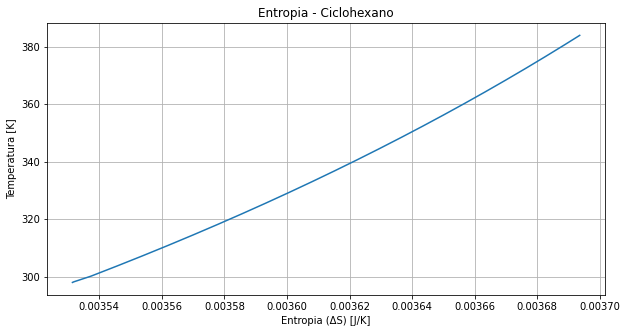

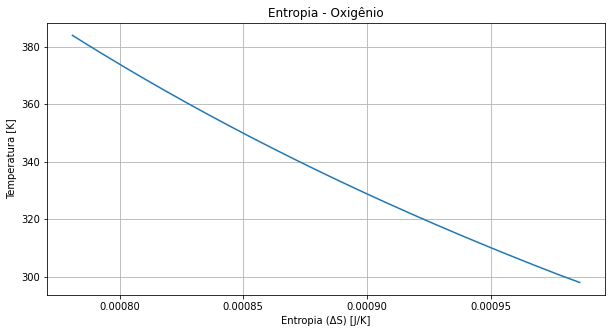

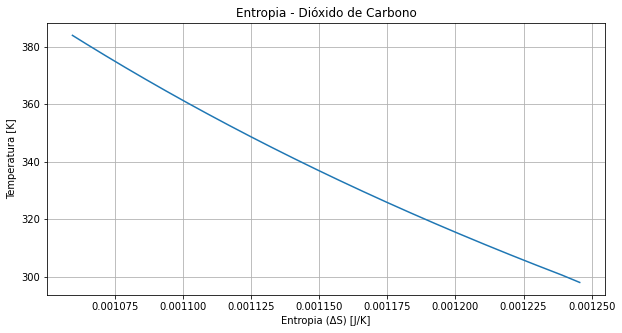

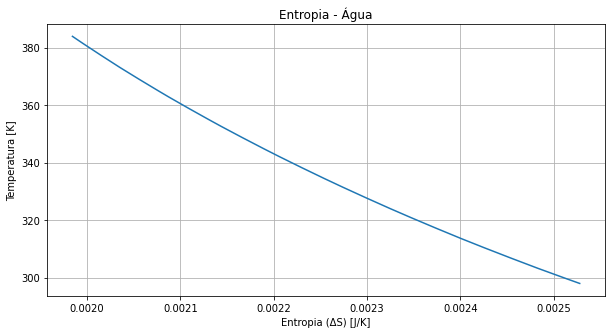

In [22]:
# Entropia de formação para o Ciclohexano

Cp_C6H12 = []
ΔS_C6H12 = []

for i in range(len(intervalo_temperatura)):
    ponto = intervalo_temperatura[i]
    f = interp1d(Temperatura_ciclohexano, Cp_ciclohexano)
    cp_C6H12 = f(ponto)
    Cp_C6H12.append(cp_C6H12)

for i, j in zip(range(len(Cp_C6H12)-1), range(len(intervalo_temperatura)-1)):
    Entropia_C6H12 = Cp_C6H12[i]*np.log(intervalo_temperatura[j+1]/intervalo_temperatura[j])
    ΔS_C6H12.append(Entropia_C6H12)

# Entropia de formação para o Oxigênio

Cp_O2 = []
ΔS_O2 = []

for i in range(len(intervalo_temperatura)):
    ponto = intervalo_temperatura[i]
    f = interp1d(Temperatura_oxigenio, Cp_oxigenio)
    cp_O2 = f(ponto)
    Cp_O2.append(cp_O2)

for i, j in zip(range(len(Cp_O2)-1), range(len(intervalo_temperatura)-1)):
    Entropia_O2 = Cp_O2[i]*np.log(intervalo_temperatura[j+1]/intervalo_temperatura[j])
    ΔS_O2.append(Entropia_O2)

# Entropia de formação para o Dióxido de Carbono

Cp_CO2 = []
ΔS_CO2 = []

for i in range(len(intervalo_temperatura)):
    ponto = intervalo_temperatura[i]
    f = interp1d(Temperatura_gas_carbonico, Cp_gas_carbonico)
    cp_CO2 = f(ponto)
    Cp_CO2.append(cp_CO2)

for i, j in zip(range(len(Cp_CO2)-1), range(len(intervalo_temperatura)-1)):
    Entropia_CO2 = Cp_CO2[i]*np.log(intervalo_temperatura[j+1]/intervalo_temperatura[j])
    ΔS_CO2.append(Entropia_CO2)

# Entropia de formação para a Água

Cp_H2O = []
ΔS_H2O = []

for i in range(len(intervalo_temperatura)):
    ponto = intervalo_temperatura[i]
    f = interp1d(Temperatura_agua_ET, Cp_agua_ET)
    cp_H2O = f(ponto)
    Cp_H2O.append(cp_H2O)

for i, j in zip(range(len(Cp_H2O)-1), range(len(intervalo_temperatura)-1)):
    Entropia_H2O = Cp_H2O[i]*np.log(intervalo_temperatura[j+1]/intervalo_temperatura[j])
    ΔS_H2O.append(Entropia_H2O)

intervalo_temperatura_copia = intervalo_temperatura.copy()
remove = intervalo_temperatura_copia.pop(-1)
print()
    
plt.figure(figsize = ((10, 5)))
plt.plot(ΔS_C6H12, intervalo_temperatura_copia)
plt.xlabel('Entropia (ΔS) [J/K]')
plt.ylabel('Temperatura [K]')
plt.title('Entropia - Ciclohexano')
plt.grid()

plt.figure(figsize = ((10, 5)))
plt.plot(ΔS_O2, intervalo_temperatura_copia)
plt.xlabel('Entropia (ΔS) [J/K]')
plt.ylabel('Temperatura [K]')
plt.title('Entropia - Oxigênio')
plt.grid()

plt.figure(figsize = ((10, 5)))
plt.plot(ΔS_CO2, intervalo_temperatura_copia)
plt.xlabel('Entropia (ΔS) [J/K]')
plt.ylabel('Temperatura [K]')
plt.title('Entropia - Dióxido de Carbono')
plt.grid()

plt.figure(figsize = ((10, 5)))
plt.plot(ΔS_H2O, intervalo_temperatura_copia)
plt.xlabel('Entropia (ΔS) [J/K]')
plt.ylabel('Temperatura [K]')
plt.title('Entropia - Água')
plt.grid()
plt.show()

A entropia é uma grandeza absoluta, independentemente de um estado de referência específico. Ela é uma propriedade termodinâmica intrínseca do sistema e pode ser calculada com base na distribuição de probabilidades dos microestados possíveis. Embora a entropia dependa das condições iniciais e finais do sistema, a variação da entropia (∆S) em um processo pode ser determinada independentemente de um estado de referência específico.

Nos gráficos apresentados, observa-se que a entropia tem um comportamento ascendente para o ciclohexano e um comportamento descendente tanto para o oxigênio, dióxido de carbono e água. Isso se justifica pelo estado físico em que casa substância se encontra, ou seja, o ciclohexano líquido e os demais elementos na fase gasosa.

#### Energia Livre de Gibbs

Conhecendo o valor da variação de entropia $\Delta S$, é possível calcular a Energia Livre de Gibbs, por meio da equação:

$$\Delta G = \Delta H - T \cdot \Delta S$$

In [23]:
ponto = T_2

f = interp1d(intervalo_temperatura_copia, ΔS_C6H12)
ΔS_C6H12_110 = f(ponto)
ΔG_C6H12_110 = diferenca_ΔcH - T_2 * ΔS_C6H12_110
print('A variação da Energia Livre de Gibbs para o Ciclohexano é', ΔG_C6H12_110, 'J')

f = interp1d(intervalo_temperatura_copia, ΔS_O2)
ΔS_O2_110 = f(ponto)
ΔG_O2_110 = diferenca_ΔcH - T_2 * ΔS_O2_110
print('A variação da Energia Livre de Gibbs para o Oxigênio é', ΔG_O2_110, 'J')

f = interp1d(intervalo_temperatura_copia, ΔS_CO2)
ΔS_CO2_110 = f(ponto)
ΔG_CO2_110 = diferenca_ΔcH - T_2 * ΔS_CO2_110
print('A variação da Energia Livre de Gibbs para o Dióxido de Carbono é', ΔG_CO2_110, 'J')

f = interp1d(intervalo_temperatura_copia, ΔS_H2O)
ΔS_H2O_110 = f(ponto)
ΔG_H2O_110 = diferenca_ΔcH - T_2 * ΔS_H2O_110
print('A variação da Energia Livre de Gibbs para a Água é', ΔG_H2O_110, 'J')

A variação da Energia Livre de Gibbs para o Ciclohexano é -3945.281512015119 J
A variação da Energia Livre de Gibbs para o Oxigênio é -3944.167220561939 J
A variação da Energia Livre de Gibbs para o Dióxido de Carbono é -3944.2738221702793 J
A variação da Energia Livre de Gibbs para a Água é -3944.629157481458 J


A energia livre de Gibbs é negativa, indicando que a reação é espontânea na direção em que ocorre a diminuição da energia livre. Nesse caso, a reação tende a ocorrer sem a necessidade de intervenção externa, ou seja, sem a adição de energia, sendo considerada exergônica. A energia livre disponível é maior nos reagentes do que nos produtos.

### Conclusão

Com base nas informções trabalhadas neste desafio, foi possível obter resultados importantes acerca da reação de combustão do ciclohexano, entendendo o comportamento do sistema e a liberação de calor para o ambiente. Essas informações são fundamentais para inferir sobre a variação de energia durante o processo de transferência de calor para o sistema e do sistema para o meio, bem como a eficiência do processo na geração de trabalho útil.

### Referências Bibliográficas

Atkins, P., & de Paula, J. (2018). **Physical chemistry** (11th ed.). Oxford: Oxford University Press.

**Carbon dioxide**. National Institute of Standards and Technology (NIST). Disponível em: <https://webbook.nist.gov/cgi/cbook.cgi?Formula=co2&NoIon=on&Units=SI&cTG=on&cTC=on&cTP=on&cTR=on&cIE=on&cIC=on. Acesso em: 14 de maio de 2023.

**Cyclohexane**. National Institute of Standards and Technology (NIST). Disponível em: <https://webbook.nist.gov/cgi/cbook.cgi?ID=C110827&Units=SI&Mask=6F>. Acesso em: 14 de maio de 2023.

Levine, I. N. (2002). **Physical Chemistry** (5th ed.). McGraw-Hill.

McQuarrie, D. A., & Simon, J. D. (1997). **Physical Chemistry: A Molecular Approach**. University Science Books.

**Oxygen**. National Institute of Standards and Technology (NIST). Disponível em: <https://webbook.nist.gov/cgi/cbook.cgi?Formula=o2&NoIon=on&Units=SI&cTG=on&cTC=on&cTP=on&cTR=on&cIE=on&cIC=on>. Acesso em: 14 de maio de 2023.

PHYSICAL PROPERTIES OF LIQUIDS AND GASES. **Ludwig's Applied Process Design for Chemical and Petrochemical Plants**. Volume 1, Fourth Edition. Elsevier. Disponível em: <https://booksite.elsevier.com/9780750683661/Appendix_C.pdf>. Acesso em: 14 de maio de 2023.

**Water**. National Institute of Standards and Technology (NIST). Disponível em: <https://webbook.nist.gov/cgi/cbook.cgi?ID=C7732185&Units=SI&Mask=6F. Acesso em: 14 de maio de 2023.

**Water - Specific Heat vs. Temperature**. Disponível em: <https://www.engineeringtoolbox.com/specific-heat-capacity-water-d_660.html>. Acesso em: 14 de maio de 2023.